In [1]:
# Seting up the working directory

import pandas as pd
import numpy as np
import os
os.chdir("C:/specdata/softcell")
train_data= pd.read_csv("GoNoGo_TRAINING_DATA.csv")
test_data= pd.read_csv("GoNoGo_TEST_DATA.csv")

C:\Users\Amar\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2717: DtypeWarning: Columns (31) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [2]:
print(train_data.shape)
print(test_data.shape)
print(train_data.columns)
print(test_data.columns)

(7759, 46)
(19189, 46)
Index(['APPLICATION_ID', 'DSA_ID', 'DEALER_ID', 'APP_DATE', 'TIME_STAMP',
       'APPLICATION_STATUS', 'QUEUE_ID', 'CURRENT_STAGE', 'MARITAL_STATUS',
       'GENDER', 'AGE', 'EDUCATION', 'RESIDENCE_TYPE', 'CITY', 'STATE',
       'ZIP_CODE', 'EMPLOY_CONSTITUTION', 'NET_TAKE_HOME_SALARY', 'PAN_STATUS',
       'CIBIL_SCORE', 'APPLICATION_SCORE', 'RESIDENTIAL_ADDRESS_SCORE',
       'OFFICE_ADDRESS_SCORE', 'NAME_SCORE', 'APPROVED_AMOUNT', 'ASSET_MAKE',
       'ASSET_CTG', 'APPLIED_AMOUNT', 'LOAN_TENOR', 'LOAN_TYPE',
       'DEDUPE_REF_ID1', 'CAR_CATEGORY', 'OWN_HOUSE_TYPE',
       'HOUSE_SURROGATE_DOCUMENT_TYPE', 'TRADER_YEAR_IN_BUSINESS',
       'TRADER_BUSINESS_PROOF', 'CREDIT_CARD_NUMBER', 'CREDIT_CARDS_CATEGORY',
       'PRIMARY_ASSET_CTG', 'PRIMARY_ASSET_MAKE', 'PRIMARY_ASSET_MODELNO',
       'VOTER_ID', 'DRIVING_LICENSE', 'AADHAAR', 'PAN', 'BANK_PASSBOOK'],
      dtype='object')
Index(['APPLICATION_ID', 'DSA_ID', 'DEALER_ID', 'APP_DATE', 'TIME_STAMP',
       'AP

# Data Preprocessing

In [3]:
#Training and test dataset are combined together for preprocessing

frames = [train_data, test_data]
data_pp = pd.concat(frames)

In [4]:
print(data_pp.shape)

# Check for missing values
print(data_pp.isnull().sum())

(26948, 46)
APPLICATION_ID                       0
DSA_ID                               0
DEALER_ID                            0
APP_DATE                             0
TIME_STAMP                           0
APPLICATION_STATUS               19189
QUEUE_ID                             0
CURRENT_STAGE                        0
MARITAL_STATUS                       1
GENDER                               0
AGE                                  0
EDUCATION                            1
RESIDENCE_TYPE                       0
CITY                                 1
STATE                                1
ZIP_CODE                             0
EMPLOY_CONSTITUTION                  1
NET_TAKE_HOME_SALARY             24686
PAN_STATUS                        1300
CIBIL_SCORE                         52
APPLICATION_SCORE                  555
RESIDENTIAL_ADDRESS_SCORE         6024
OFFICE_ADDRESS_SCORE              6023
NAME_SCORE                       16592
APPROVED_AMOUNT                  14620
ASSET_MAKE   

In [5]:
#Those columns where more than 80% of the data are missing, are dropped

data_pp = data_pp.drop(['NET_TAKE_HOME_SALARY','DEDUPE_REF_ID1','CAR_CATEGORY','TRADER_YEAR_IN_BUSINESS','TRADER_BUSINESS_PROOF',
                  'CREDIT_CARD_NUMBER', 'CREDIT_CARDS_CATEGORY'], 1)

In [6]:
# Check for some value counts

In [7]:
data_pp['EDUCATION'].value_counts()

GRADUATE          14899
UNDER GRADUATE     6094
OTHERS             4383
POST-GRADUATE      1454
PROFESSIONAL         83
DOCTORATE            34
Name: EDUCATION, dtype: int64

In [8]:
data_pp['CITY'].value_counts()

HYDERABAD               2804
CHENNAI                 2316
AHMEDABAD               1434
KOLKATTA                1229
COIMBATORE              1177
BHOPAL                  1176
MADURAI                  875
INDORE                   838
BANGALORE                771
VIJAYAWADA               737
DELHI                    731
VISAKHAPATNAM            582
VADODARA                 564
PONDICHERRY              534
SALEM                    454
TRICHY                   418
SILIGURI                 370
SURAT                    361
JAMNAGAR                 348
PUNE                     334
GUNTUR                   326
JABALPUR                 323
RAJKOT                   317
TIRUNELVELI              276
UJJAIN                   269
MYSORE                   255
RAIPUR                   249
TIRUPATHI                243
RATHLAM                  233
DURG.                    184
                        ... 
UDAYAMARTHANDAM            1
SEHORE                     1
FINGAPARA                  1
THIRUVARAMBU  

In [9]:
data_pp['EMPLOY_CONSTITUTION'].value_counts()

SELF-EMPLOYED              14627
SALARIED                   12202
PRIVATE LIMITED COMPANY       52
PARTNERSHIP                   44
TRUST                         22
Name: EMPLOY_CONSTITUTION, dtype: int64

In [10]:
data_pp['STATE'].value_counts()

TAMIL NADU        8594
GUJARAT           3938
MADHYA PRADESH    3125
TELANGANA         2804
WEST BENGAL       2597
ANDHRA PRADESH    2265
KARNATAKA         1086
MAHARASHTRA        866
DELHI              771
CHHATTISGARH       637
ASSAM              114
UTTAR PRADESH       66
HARYANA             51
BIHAR               33
Name: STATE, dtype: int64

In [11]:
data_pp['MARITAL_STATUS'].value_counts()

Married    21479
Single      5468
Name: MARITAL_STATUS, dtype: int64

In [12]:
# Data imputation

#Median 
data_pp['RESIDENTIAL_ADDRESS_SCORE']=data_pp['RESIDENTIAL_ADDRESS_SCORE'].fillna(data_pp.RESIDENTIAL_ADDRESS_SCORE.median())
data_pp['OFFICE_ADDRESS_SCORE']=data_pp['OFFICE_ADDRESS_SCORE'].fillna(data_pp.OFFICE_ADDRESS_SCORE.median())
data_pp['NAME_SCORE']=data_pp['NAME_SCORE'].fillna(data_pp.NAME_SCORE.median())

# Mean
data_pp['APPROVED_AMOUNT']=data_pp['APPROVED_AMOUNT'].fillna(data_pp.APPROVED_AMOUNT.mean())

# Mode is used for categorical variables
data_pp['ASSET_MAKE']=data_pp['ASSET_MAKE'].fillna('LG')
data_pp['ASSET_CTG']=data_pp['ASSET_CTG'].fillna('PANEL - LED')
data_pp['OWN_HOUSE_TYPE']=data_pp['OWN_HOUSE_TYPE'].fillna('Parent Owned')
data_pp['HOUSE_SURROGATE_DOCUMENT_TYPE']=data_pp['HOUSE_SURROGATE_DOCUMENT_TYPE'].fillna('Utility Bill ')
data_pp['PAN_STATUS']=data_pp['PAN_STATUS'].fillna('Pan Not Submitted')

data_pp['APPLICATION_SCORE'].replace(to_replace=['RENGANATHAN MOHAN ', '-'], value=[np.NaN, np.NaN], inplace=True)
data_pp['APPLICATION_SCORE']=data_pp['APPLICATION_SCORE'].fillna(45)
data_pp['APPLICATION_SCORE']= pd.to_numeric(data_pp['APPLICATION_SCORE'])

data_pp['CIBIL_SCORE'].replace(to_replace=['0', '', '000-1', '-'], value=[np.NaN, np.NaN, np.NaN, np.NaN ], inplace=True)
data_pp['CIBIL_SCORE']=(data_pp['CIBIL_SCORE'].fillna(691))
data_pp['CIBIL_SCORE']= pd.to_numeric(data_pp['CIBIL_SCORE'])

data_pp['EDUCATION']=data_pp['EDUCATION'].fillna('GRADUATE') 
data_pp['CITY']=data_pp['CITY'].fillna('HYDERABAD') 
data_pp['STATE']=data_pp['STATE'].fillna('TAMIL NADU') 
data_pp['EMPLOY_CONSTITUTION']=data_pp['EMPLOY_CONSTITUTION'].fillna('SELF-EMPLOYED') 
data_pp['MARITAL_STATUS']=data_pp['MARITAL_STATUS'].fillna('Married')
data_pp['APPLICATION_STATUS']=data_pp['APPLICATION_STATUS'].fillna('NaN')


In [13]:
#Check for missing data again

print(data_pp.isnull().sum())

APPLICATION_ID                   0
DSA_ID                           0
DEALER_ID                        0
APP_DATE                         0
TIME_STAMP                       0
APPLICATION_STATUS               0
QUEUE_ID                         0
CURRENT_STAGE                    0
MARITAL_STATUS                   0
GENDER                           0
AGE                              0
EDUCATION                        0
RESIDENCE_TYPE                   0
CITY                             0
STATE                            0
ZIP_CODE                         0
EMPLOY_CONSTITUTION              0
PAN_STATUS                       0
CIBIL_SCORE                      0
APPLICATION_SCORE                0
RESIDENTIAL_ADDRESS_SCORE        0
OFFICE_ADDRESS_SCORE             0
NAME_SCORE                       0
APPROVED_AMOUNT                  0
ASSET_MAKE                       0
ASSET_CTG                        0
APPLIED_AMOUNT                   0
LOAN_TENOR                       0
LOAN_TYPE           

# Assignment 1

In [14]:
# Explolatory data analysis. This graph is generic. Similar grapgh can be plotted by changing the values for Histogram

import plotly.graph_objs as go
import plotly.plotly as py

cibil_data = [go.Histogram(x=data_pp['APPLIED_AMOUNT'])]

py.iplot(cibil_data, filename='APPLIED_AMOUNT DISTRIBUTION GRAPH')

In [15]:
import plotly.graph_objs as go
import plotly.plotly as py

asset_data = [go.Histogram(x=data_pp['ASSET_CTG'])]

py.iplot(asset_data, filename='ASSET_CTG DISTRIBUTION GRAPH')

In [16]:
# Create training and test dataset for Straight Through Process. 

train= data_pp[(data_pp.QUEUE_ID=='Straight  Through Process') & (data_pp.APPLICATION_STATUS!= 'NaN')].reset_index()
test= data_pp[(data_pp.QUEUE_ID=='Straight  Through Process') & (data_pp.APPLICATION_STATUS =='NaN')].reset_index()

In [17]:
#These dataset can be exported by activating this command
#train.to_csv("train.csv")
#test.to_csv("test.csv")

In [18]:
#Check for similarity of the dataset

print(train.columns)
print(test.columns)

Index(['index', 'APPLICATION_ID', 'DSA_ID', 'DEALER_ID', 'APP_DATE',
       'TIME_STAMP', 'APPLICATION_STATUS', 'QUEUE_ID', 'CURRENT_STAGE',
       'MARITAL_STATUS', 'GENDER', 'AGE', 'EDUCATION', 'RESIDENCE_TYPE',
       'CITY', 'STATE', 'ZIP_CODE', 'EMPLOY_CONSTITUTION', 'PAN_STATUS',
       'CIBIL_SCORE', 'APPLICATION_SCORE', 'RESIDENTIAL_ADDRESS_SCORE',
       'OFFICE_ADDRESS_SCORE', 'NAME_SCORE', 'APPROVED_AMOUNT', 'ASSET_MAKE',
       'ASSET_CTG', 'APPLIED_AMOUNT', 'LOAN_TENOR', 'LOAN_TYPE',
       'OWN_HOUSE_TYPE', 'HOUSE_SURROGATE_DOCUMENT_TYPE', 'PRIMARY_ASSET_CTG',
       'PRIMARY_ASSET_MAKE', 'PRIMARY_ASSET_MODELNO', 'VOTER_ID',
       'DRIVING_LICENSE', 'AADHAAR', 'PAN', 'BANK_PASSBOOK'],
      dtype='object')
Index(['index', 'APPLICATION_ID', 'DSA_ID', 'DEALER_ID', 'APP_DATE',
       'TIME_STAMP', 'APPLICATION_STATUS', 'QUEUE_ID', 'CURRENT_STAGE',
       'MARITAL_STATUS', 'GENDER', 'AGE', 'EDUCATION', 'RESIDENCE_TYPE',
       'CITY', 'STATE', 'ZIP_CODE', 'EMPLOY_CONSTITUTIO

In [19]:
# Drop irrelevant columns from the dataset

train_X= train[['APPLICATION_ID', 'DSA_ID', 'DEALER_ID', 'APP_DATE', 'TIME_STAMP',
       'CURRENT_STAGE', 'MARITAL_STATUS',
       'GENDER', 'AGE', 'EDUCATION', 'RESIDENCE_TYPE', 'CITY', 'STATE',
       'ZIP_CODE', 'EMPLOY_CONSTITUTION', 'PAN_STATUS', 'CIBIL_SCORE',
       'APPLICATION_SCORE', 'RESIDENTIAL_ADDRESS_SCORE',
       'OFFICE_ADDRESS_SCORE', 'NAME_SCORE', 'APPROVED_AMOUNT', 'ASSET_MAKE',
       'ASSET_CTG', 'APPLIED_AMOUNT', 'LOAN_TENOR', 'LOAN_TYPE',
       'OWN_HOUSE_TYPE', 'HOUSE_SURROGATE_DOCUMENT_TYPE', 'PRIMARY_ASSET_CTG',
       'PRIMARY_ASSET_MAKE', 'PRIMARY_ASSET_MODELNO', 'VOTER_ID',
       'DRIVING_LICENSE', 'AADHAAR', 'PAN', 'BANK_PASSBOOK']]

train_Y = pd.DataFrame(train['APPLICATION_STATUS'])

test_X= test[['APPLICATION_ID', 'DSA_ID', 'DEALER_ID', 'APP_DATE', 'TIME_STAMP',
       'CURRENT_STAGE', 'MARITAL_STATUS',
       'GENDER', 'AGE', 'EDUCATION', 'RESIDENCE_TYPE', 'CITY', 'STATE',
       'ZIP_CODE', 'EMPLOY_CONSTITUTION', 'PAN_STATUS', 'CIBIL_SCORE',
       'APPLICATION_SCORE', 'RESIDENTIAL_ADDRESS_SCORE',
       'OFFICE_ADDRESS_SCORE', 'NAME_SCORE', 'APPROVED_AMOUNT', 'ASSET_MAKE',
       'ASSET_CTG', 'APPLIED_AMOUNT', 'LOAN_TENOR', 'LOAN_TYPE',
       'OWN_HOUSE_TYPE', 'HOUSE_SURROGATE_DOCUMENT_TYPE', 'PRIMARY_ASSET_CTG',
       'PRIMARY_ASSET_MAKE', 'PRIMARY_ASSET_MODELNO', 'VOTER_ID',
       'DRIVING_LICENSE', 'AADHAAR', 'PAN', 'BANK_PASSBOOK']]

In [20]:
train_Y.head()

,APPLICATION_STATUS
0,Declined
1,Approved
2,Approved
3,Approved
4,Declined


In [23]:
#Encoding the categorical variable

from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder
train_X= train_X.apply(LabelEncoder().fit_transform)
train_Y= train_Y.apply(LabelEncoder().fit_transform)
test_X= test_X.apply(LabelEncoder().fit_transform)

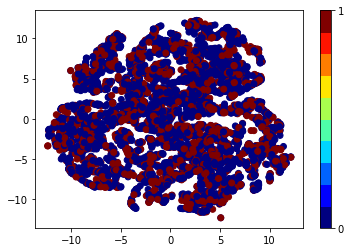

In [24]:
# Transforming high dimension data into 2D data to analyse the scatter

from sklearn.manifold import TSNE
model = TSNE(n_components=2, random_state=0)
np.set_printoptions(suppress=True)
tsne = model.fit_transform(train_X) 

tsne_x = tsne[:, 0]
tsne_y = tsne[:, 1]

from matplotlib import pyplot as plt
plt.scatter(tsne_x, tsne_y, c=train_Y['APPLICATION_STATUS'], cmap=plt.cm.get_cmap("jet", 10))
plt.colorbar(ticks=range(10))
plt.clim()
plt.show()

#There are atleat 4 different cluster within the group (Visual Inspection). There are no outliers

In [25]:
#Random Forest to predict the 'Application status' for 'Straigh Through Process'

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score

RF1 = RandomForestClassifier(n_estimators=40,criterion='entropy',)
RF1.fit(train_X, train_Y['APPLICATION_STATUS'])

# Evaluation metrics 
# Accuracy, Precision and Recall calculated with 10 fold cross validation.

scores_RF1 = cross_val_score(RF1, train_X, train_Y['APPLICATION_STATUS'], cv=10)
scores_precision1 = cross_val_score(RF1, train_X, train_Y['APPLICATION_STATUS'], cv=10, scoring='precision')
scores_recall1 = cross_val_score(RF1, train_X, train_Y['APPLICATION_STATUS'], cv=10, scoring='recall')

# Predict the Application Status for the test set and store it in Dataframe test_X
test_X['Application Status']= RF1.predict(test_X)

print('Cross Validation accuracy score: ', scores_RF1)
print('Cross Validation precision score: ',scores_precision1)
print('Cross Validation recall score: ', scores_recall1)
print('Average accuracy score is: ',scores_RF1.mean())
print('Average precision score is: ',scores_precision1.mean())
print('Average recall score is: ',scores_recall1.mean())


Cross Validation accuracy score:  [ 0.99628253  0.99628253  1.          0.99814126  0.99255121  0.99441341
  1.          1.          1.          0.99626866]
Cross Validation precision score:  [ 0.99473684  1.          1.          1.          0.9947644   0.99479167
  1.          1.          1.          1.        ]
Cross Validation recall score:  [ 0.99479167  0.98958333  1.          0.99479167  0.99479167  0.99479167
  1.          1.          1.          0.9947644 ]
Average accuracy score is:  0.997393959467
Average precision score is:  0.998429290668
Average recall score is:  0.996351439791


In [26]:
#Export test dataset 

test_X.to_csv("test_X.csv")


# Assignment 2: Prediction for underwriters

In [27]:
#Create train and test dataset

train2= data_pp[(data_pp.QUEUE_ID=='Under.Writer') & (data_pp.APPLICATION_STATUS!= 'NaN')].reset_index()
test2= data_pp[(data_pp.QUEUE_ID=='Under.Writer') & (data_pp.APPLICATION_STATUS =='NaN')].reset_index()

In [28]:
train2_X= train2[['APPLICATION_ID', 'DSA_ID', 'DEALER_ID', 'APP_DATE', 'TIME_STAMP',
       'CURRENT_STAGE', 'MARITAL_STATUS',
       'GENDER', 'AGE', 'EDUCATION', 'RESIDENCE_TYPE', 'CITY', 'STATE',
       'ZIP_CODE', 'EMPLOY_CONSTITUTION', 'PAN_STATUS', 'CIBIL_SCORE',
       'APPLICATION_SCORE', 'RESIDENTIAL_ADDRESS_SCORE',
       'OFFICE_ADDRESS_SCORE', 'NAME_SCORE', 'APPROVED_AMOUNT', 'ASSET_MAKE',
       'ASSET_CTG', 'APPLIED_AMOUNT', 'LOAN_TENOR', 'LOAN_TYPE',
       'OWN_HOUSE_TYPE', 'HOUSE_SURROGATE_DOCUMENT_TYPE', 'PRIMARY_ASSET_CTG',
       'PRIMARY_ASSET_MAKE', 'PRIMARY_ASSET_MODELNO', 'VOTER_ID',
       'DRIVING_LICENSE', 'AADHAAR', 'PAN', 'BANK_PASSBOOK']]

train2_Y = pd.DataFrame(train2['APPLICATION_STATUS'])

test2_X= test2[['APPLICATION_ID', 'DSA_ID', 'DEALER_ID', 'APP_DATE', 'TIME_STAMP',
       'CURRENT_STAGE', 'MARITAL_STATUS',
       'GENDER', 'AGE', 'EDUCATION', 'RESIDENCE_TYPE', 'CITY', 'STATE',
       'ZIP_CODE', 'EMPLOY_CONSTITUTION', 'PAN_STATUS', 'CIBIL_SCORE',
       'APPLICATION_SCORE', 'RESIDENTIAL_ADDRESS_SCORE',
       'OFFICE_ADDRESS_SCORE', 'NAME_SCORE', 'APPROVED_AMOUNT', 'ASSET_MAKE',
       'ASSET_CTG', 'APPLIED_AMOUNT', 'LOAN_TENOR', 'LOAN_TYPE',
       'OWN_HOUSE_TYPE', 'HOUSE_SURROGATE_DOCUMENT_TYPE', 'PRIMARY_ASSET_CTG',
       'PRIMARY_ASSET_MAKE', 'PRIMARY_ASSET_MODELNO', 'VOTER_ID',
       'DRIVING_LICENSE', 'AADHAAR', 'PAN', 'BANK_PASSBOOK']]

In [29]:
#Encoding the categorical variable

from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder
train2_X= train2_X.apply(LabelEncoder().fit_transform)
train2_Y= train2_Y.apply(LabelEncoder().fit_transform)
test2_X= test2_X.apply(LabelEncoder().fit_transform)

In [30]:
# Random Forest to predict the 'Application status' for 'Under writer Process'
# Naive Bayes was the second best algorithm, which predicted the label with 87% accuracy
# Other algorith tested were KNN and SVM. They did not perform well

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score

RF2 = RandomForestClassifier(n_estimators=40,criterion='entropy',)
RF2.fit(train2_X, train2_Y['APPLICATION_STATUS'])

# Evaluation metrics 
# Accuracy, Precision and Recall calculated with 10 fold cross validation.

scores_RF2 = cross_val_score(RF2, train2_X, train2_Y['APPLICATION_STATUS'], cv=10)
scores_precision2 = cross_val_score(RF2, train2_X, train2_Y['APPLICATION_STATUS'], cv=10, scoring='precision')
scores_recall2 = cross_val_score(RF2, train2_X, train2_Y['APPLICATION_STATUS'], cv=10, scoring='recall')

# Predict the Application Status for the test set and store it in Dataframe test_X
test2_X['Application Status']= RF2.predict(test2_X)

# Print the Random forest results

print('Cross Validation accuracy score: ', scores_RF2)
print('Cross Validation precision score: ',scores_precision2)
print('Cross Validation recall score: ', scores_recall2)
print('Average accuracy score is: ',scores_RF2.mean())
print('Average precision score is: ',scores_precision2.mean())
print('Average recall score is: ',scores_recall2.mean())

Cross Validation accuracy score:  [ 1.          1.          1.          1.          0.99579832  0.99579832
  1.          1.          1.          1.        ]
Cross Validation precision score:  [ 1.         1.         1.         1.         0.9929078  0.9929078  1.         1.
  1.         1.       ]
Cross Validation recall score:  [ 1.  1.  1.  1.  1.  1.  1.  1.  1.  1.]
Average accuracy score is:  0.999159663866
Average precision score is:  0.998581560284
Average recall score is:  1.0


In [31]:
test2_X.to_csv("test2_X.csv")

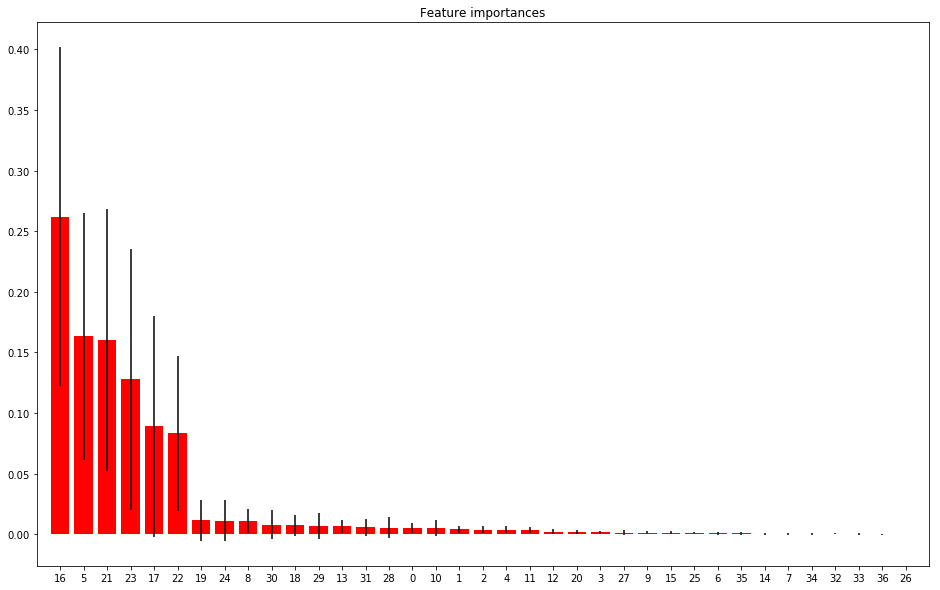

Features importance in decreasing order:  [16  5 21 23 17 22 19 24  8 30 18 29 13 31 28  0 10  1  2  4 11 12 20  3 27
  9 15 25  6 35 14  7 34 32 33 36 26]
CIBIL_SCORE
CURRENT_STAGE
APPROVED_AMOUNT
ASSET_CTG
APPLICATION_SCORE
ASSET_MAKE
OFFICE_ADDRESS_SCORE
APPLIED_AMOUNT
AGE
PRIMARY_ASSET_MAKE
RESIDENTIAL_ADDRESS_SCORE
PRIMARY_ASSET_CTG
ZIP_CODE
PRIMARY_ASSET_MODELNO
HOUSE_SURROGATE_DOCUMENT_TYPE
APPLICATION_ID
RESIDENCE_TYPE
DSA_ID
DEALER_ID
TIME_STAMP
CITY
STATE
NAME_SCORE
APP_DATE
OWN_HOUSE_TYPE
EDUCATION
PAN_STATUS
LOAN_TENOR
MARITAL_STATUS
PAN
EMPLOY_CONSTITUTION
GENDER
AADHAAR
VOTER_ID
DRIVING_LICENSE
BANK_PASSBOOK
LOAN_TYPE


In [32]:
# There are 46 different features which were used in the Random Forest prediction. 
# The following block will determin the level of influence of different features for 'Straight Through Process'

importances1 = RF1.feature_importances_
std1 = np.std([tree1.feature_importances_ for tree1 in RF1.estimators_],
             axis=0)
indices1 = np.argsort(importances1)[::-1]

# Plot a bar chart to represent the influence of different features
plt.figure(figsize=(16, 10))
plt.title("Feature importances")
plt.bar(range(train_X.shape[1]), importances1[indices1],
       color="r", yerr=std1[indices1], align="center")
plt.xticks(range(train_X.shape[1]), indices1)
plt.xlim([-1, train_X.shape[1]])
plt.show()
print('Features importance in decreasing order: ', indices1)

#Print the features in descending order

for features in range(len(indices1)):
    print(train_X.columns[indices1[features]])

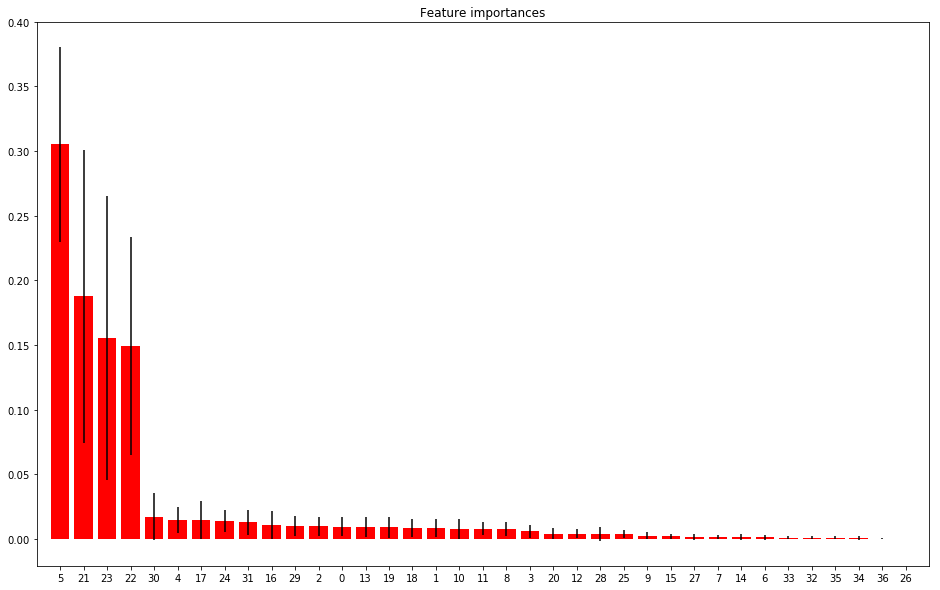

Features importance in decreasing order:  [ 5 21 23 22 30  4 17 24 31 16 29  2  0 13 19 18  1 10 11  8  3 20 12 28 25
  9 15 27  7 14  6 33 32 35 34 36 26]
CURRENT_STAGE
APPROVED_AMOUNT
ASSET_CTG
ASSET_MAKE
PRIMARY_ASSET_MAKE
TIME_STAMP
APPLICATION_SCORE
APPLIED_AMOUNT
PRIMARY_ASSET_MODELNO
CIBIL_SCORE
PRIMARY_ASSET_CTG
DEALER_ID
APPLICATION_ID
ZIP_CODE
OFFICE_ADDRESS_SCORE
RESIDENTIAL_ADDRESS_SCORE
DSA_ID
RESIDENCE_TYPE
CITY
AGE
APP_DATE
NAME_SCORE
STATE
HOUSE_SURROGATE_DOCUMENT_TYPE
LOAN_TENOR
EDUCATION
PAN_STATUS
OWN_HOUSE_TYPE
GENDER
EMPLOY_CONSTITUTION
MARITAL_STATUS
DRIVING_LICENSE
VOTER_ID
PAN
AADHAAR
BANK_PASSBOOK
LOAN_TYPE


In [33]:
# There are 46 different features which were used in the Random Forest prediction. 
# The following block will determin the level of influence of different features for 'Under writer Process'

importances2 = RF2.feature_importances_
std2 = np.std([tree2.feature_importances_ for tree2 in RF2.estimators_],
             axis=0)
indices2 = np.argsort(importances2)[::-1]

# Plot a bar chart to represent the influence of different features
plt.figure(figsize=(16, 10))
plt.title("Feature importances")
plt.bar(range(train2_X.shape[1]), importances2[indices2],
       color="r", yerr=std2[indices2], align="center")
plt.xticks(range(train2_X.shape[1]), indices2)
plt.xlim([-1, train2_X.shape[1]])
plt.show()
print('Features importance in decreasing order: ', indices2)

#Print the features in descending order

for features in range(len(indices2)):
    print(train_X.columns[indices2[features]])

In [34]:
# CIBIL score is one of the key determinant of the Application status. 
import plotly.plotly as py
import plotly.graph_objs as go

# Create a trace
trace = go.Scatter(
    x = train_X['CIBIL_SCORE'],
    y = train_Y['APPLICATION_STATUS'],
    mode = 'markers'
)

data = [trace]

# Plot and embed in ipython notebook!
py.iplot(data, filename='CIBIL')

In [35]:
# The CIBIL score below 210 is always rejected

In [36]:
# Check whether there is any relationship between age and Application status

trace1 = go.Scatter(
    x = train_X['AGE'],
    y = train_X['CIBIL_SCORE'],
    mode = 'markers'
)

data1 = [trace1]

# Plot and embed in ipython notebook!
py.iplot(data1, filename='AGE Vs Application Status')


In [37]:
#The relation between 'age' and the 'application status' is very fuzzy

In [38]:
#Statewise study of appplication status

state_a= train.loc[train.APPLICATION_STATUS=='Approved',:]
state_d= train.loc[train.APPLICATION_STATUS=='Declined',:]
state_a= pd.DataFrame(state_a.STATE.value_counts()).reset_index()
state_d= pd.DataFrame(state_d.STATE.value_counts()).reset_index()
state= pd.merge(state_a, state_d, on= 'index', how= 'left')
state.columns= ['State', 'Approved', 'Declined']

# Keep the 10 most important states
state= state.drop(state.index[[10,11,12,13]])


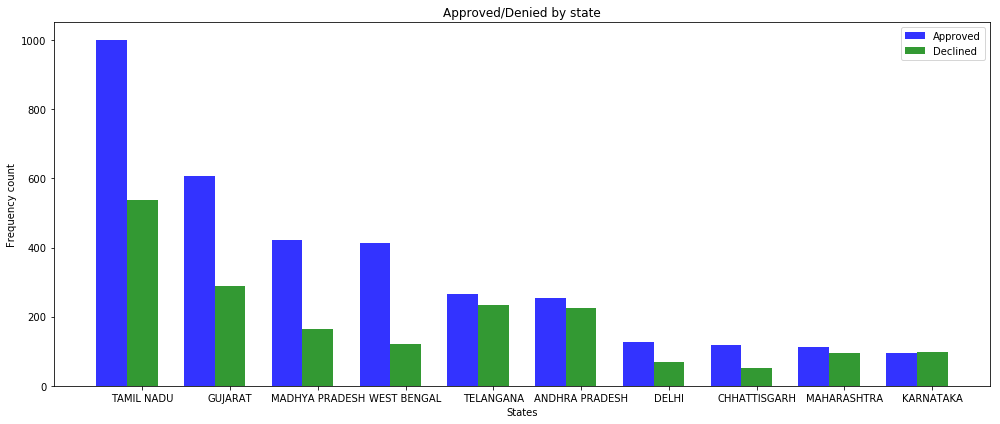

In [39]:
#Plot State Vs Application Status

import numpy as np
import matplotlib.pyplot as plt

 
# data to plot
n_groups = 10
Approved = state['Approved']
Declined = state['Declined']
 
# create plot
fig, ax = plt.subplots(figsize=(14, 6))
index = np.arange(n_groups)
bar_width = 0.35
opacity = 0.8
 
rects1 = plt.bar(index, Approved, bar_width,
                 alpha=opacity,
                 color='b',
                 label='Approved')
 
rects2 = plt.bar(index + bar_width, Declined, bar_width,
                 alpha=opacity,
                 color='g',
                 label='Declined')
 
plt.xlabel('States')
plt.ylabel('Frequency count')
plt.title('Approved/Denied by state')
plt.xticks(index + bar_width, (state['State']))
plt.legend()
 
plt.tight_layout()
plt.show()

In [40]:
# TN, MP and WB has the highest approval rate, where as Telengana and AP has the lowest approval rate

In [41]:
#Similar plots can be developed for all the other features to feed into the customers dashboard